# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sb

# Little Analysis

In [ ]:
DATA_PATH = "Advertising.csv"

This dataset displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [ ]:
df = pd.read_csv(DATA_PATH,index_col='Unnamed: 0')
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
df.size

800

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [ ]:
df.isnull().sum()

,0
TV,0
radio,0
newspaper,0
sales,0


In [ ]:
df.notna().sum()

,0
TV,200
radio,200
newspaper,200
sales,200


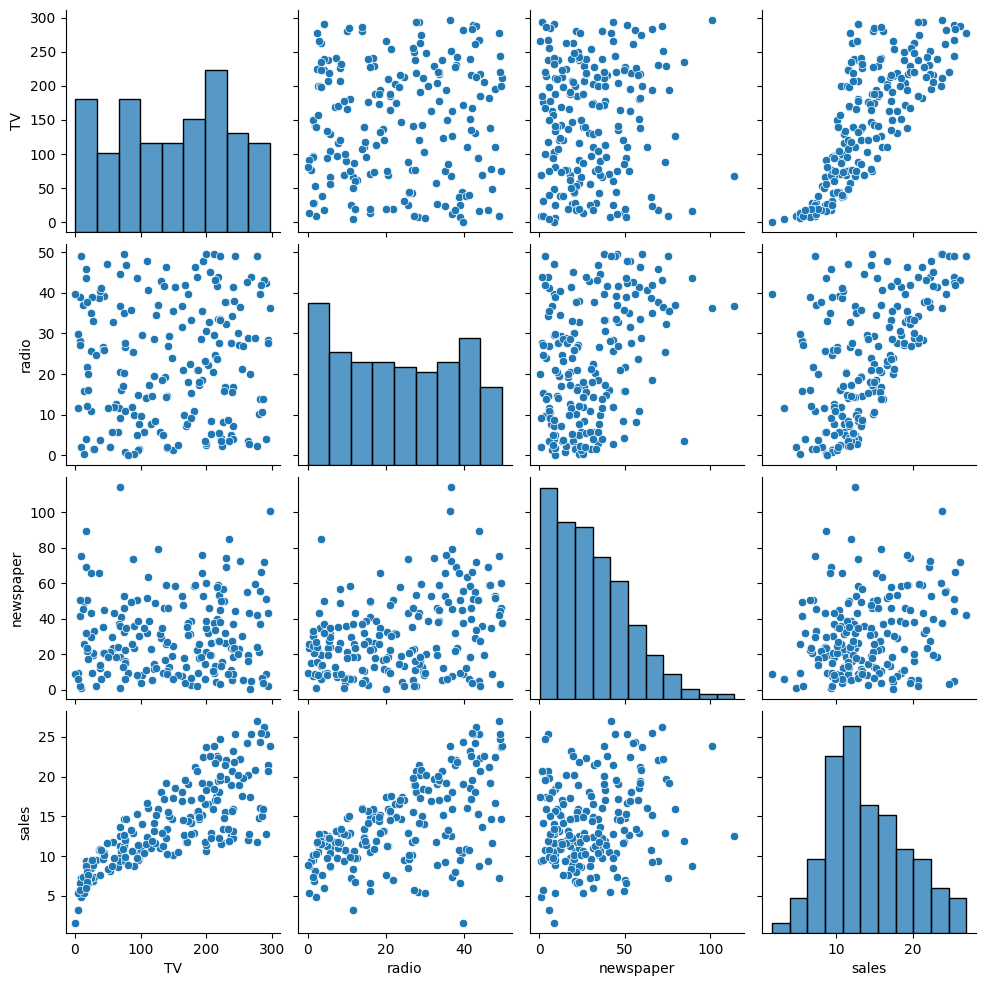

In [ ]:
sb.pairplot(df)

In this plot, we can see that there is a relationship between sales and TV and Radio, but there is no clear relationship between sales and newspaper. This is confirmed (though not shown) by a coefficient plot. So let's just drop the newspaper column.

In [ ]:
X = df.drop(['sales','newspaper'],axis=1)
y = df['sales']
columns = X.columns.to_list()
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
poly = PolynomialFeatures(2)
X = poly.fit_transform(X)

Polynomial Features increase model performance. Before applying Polynomial Features, the R-squared was approximately 89.72%

In [ ]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
model.score(X,y)

0.986039101078374

Polynomial Features = Better R-squared = Better Generalization (sometimes)

In [ ]:
coefs = model.coef_.flatten().tolist()
columns = poly.get_feature_names_out()

Text(0.5, 1.0, 'coefficient analysis')

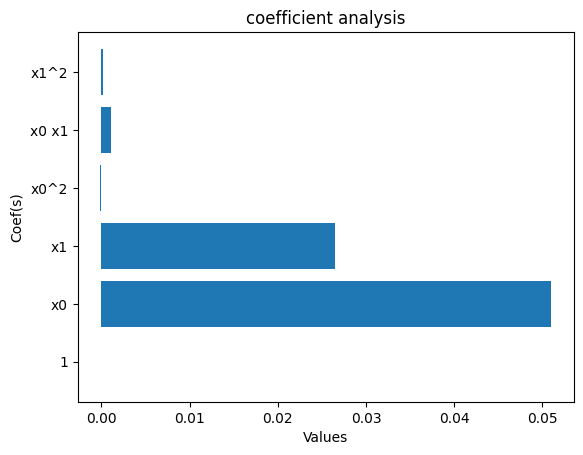

In [ ]:
plt.barh(columns,coefs)
plt.xlabel("Values")
plt.ylabel("Coef(s)")
plt.title("coefficient analysis")

In [ ]:
y_pred = model.predict(X)

In [ ]:
residuals = y - y_pred

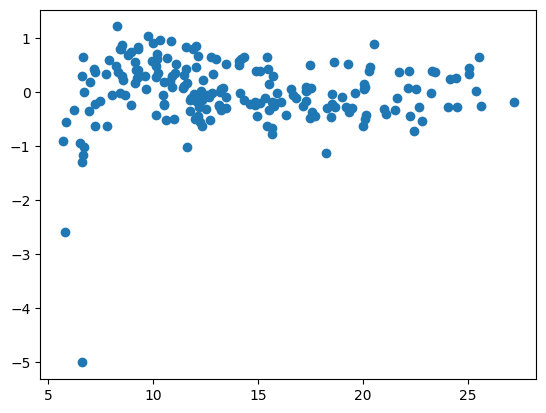

In [ ]:
plt.scatter(y_pred,residuals)

This residual plot doesn't show a clear pattern, which is good. Most points are centered around zero, except for some outliers that I chose not to eliminate due to the dataset length